In [ ]:
# 1. Make a directory for the Kaggle API token and move the file
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# 2. Download the dataset
!kaggle datasets download -d meenalsaini/student-getting-placements-or-not

# 3. Unzip the dataset
!unzip student-getting-placements-or-not.zip


Dataset URL: https://www.kaggle.com/datasets/meenalsaini/student-getting-placements-or-not
License(s): MIT
  0% 0.00/1.90k [00:00<?, ?B/s]
100% 1.90k/1.90k [00:00<00:00, 4.96MB/s]
Archive:  student-getting-placements-or-not.zip
  inflating: students_placement.csv  


In [ ]:
import pandas as pd

df = pd.read_csv("students_placement.csv")

In [ ]:
df.dropna(subset=['profile_score'], inplace=True)
df.columns

Index(['cgpa', 'iq', 'profile_score', 'placed', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [ ]:
dff = df[['cgpa', 'iq', 'placed']]
dff

,cgpa,iq,placed
0,5.97,106,0
1,6.83,113,0
2,6.60,110,0
3,5.54,113,0
4,6.84,102,0
...,...,...,...
295,6.44,107,0
296,6.09,108,0
297,7.68,101,1
298,7.00,90,1


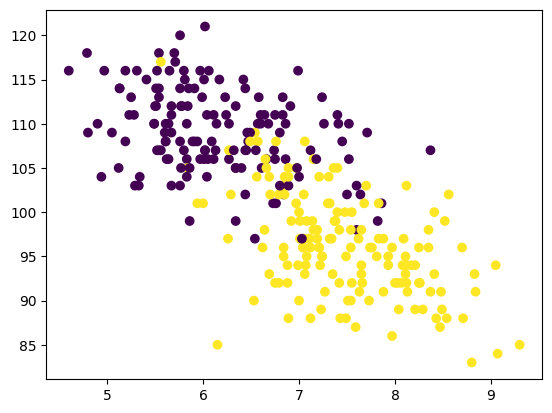

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dff['cgpa'] , dff['iq'], c=dff['placed'] )


In [ ]:
df =dff

In [ ]:
x= df.iloc[:, 0:2]
y= df.iloc[:, -1]

In [ ]:
print (x)
print (y)

     cgpa   iq
0    5.97  106
1    6.83  113
2    6.60  110
3    5.54  113
4    6.84  102
..    ...  ...
295  6.44  107
296  6.09  108
297  7.68  101
298  7.00   90
299  4.79  118

[300 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    1
298    1
299    0
Name: placed, Length: 300, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)





In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8333333333333334

<Axes: >

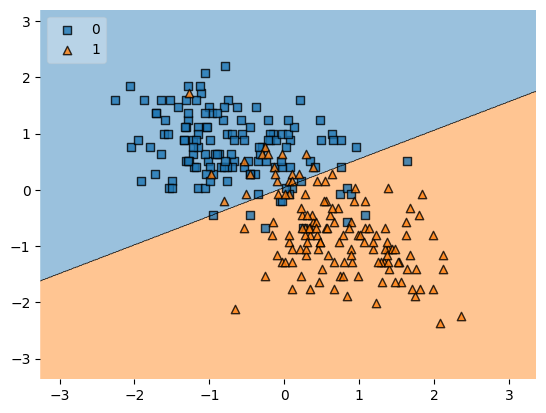

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values , clf=lr, legend =2)

In [ ]:
import pickle
pickle.dump(lr, open('model:pk1' , 'wb'))